In [1]:
import pickle
car_cords = open("car_cords.pkl","rb")
car_cords = pickle.load(car_cords)

In [2]:
img_dir = 'camera1/'

In [3]:
import cv2 
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

In [4]:
options = {
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolov2.weights',
    'threshold': 0.3 ,
    'gpu': 1.0
}

tfnet = TFNet(options)

/home/vedic/Winden/darkflow-master/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.026236295700073242s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

In [5]:
import cv2
test_image = cv2.imread(img_dir + "2015-12-17_1448.jpg" )

In [25]:
crop_images = []
for i in range(len(car_cords)):
    tlx = car_cords[i][0]
    tly = car_cords[i][1]
    brx = car_cords[i][2]
    bry = car_cords[i][3]
    crop_images.append(test_image[tly:bry, tlx:brx])

In [62]:
Green_Box = []
Red_Box = []
for i in range(len(crop_images)):
    results = tfnet.return_predict(crop_images[i])
    for j in range(len(results)):
        if results[j]['label'] == 'car':
            Green_Box.append(car_cords[i])
            break

In [68]:
Red_Box = [cords for cords in car_cords if cords not in Green_Box]

In [70]:
Red_Box

[[469, 75, 526, 107],
 [519, 82, 576, 113],
 [254, 124, 337, 167],
 [423, 120, 498, 171],
 [586, 104, 658, 142],
 [704, 123, 738, 157],
 [25, 157, 114, 207],
 [349, 164, 441, 210],
 [480, 147, 557, 188],
 [522, 152, 599, 194],
 [553, 165, 641, 212],
 [84, 185, 179, 234],
 [418, 188, 500, 238],
 [460, 201, 545, 252],
 [191, 236, 272, 294],
 [483, 219, 554, 265],
 [513, 227, 616, 283],
 [877, 216, 957, 274],
 [13, 262, 83, 321],
 [642, 270, 734, 327],
 [49, 307, 129, 366],
 [255, 302, 337, 363],
 [111, 351, 189, 414],
 [291, 337, 403, 399],
 [636, 336, 753, 403],
 [333, 366, 462, 448],
 [747, 386, 881, 466],
 [159, 412, 270, 493],
 [408, 404, 512, 475],
 [478, 424, 597, 499],
 [257, 477, 385, 590],
 [523, 497, 620, 560],
 [542, 475, 664, 571],
 [356, 576, 496, 710],
 [481, 693, 624, 747]]

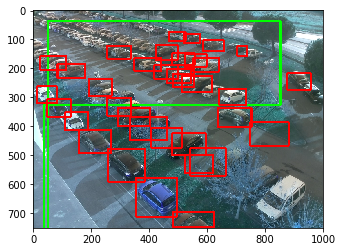

In [71]:
for cords in Green_Box:
    tl = (cords[0], cords[1])
    br = (cords[2], cords[3])
    test_image = cv2.rectangle(test_image, tl, br, (0, 255, 0), 5)

for cords in Red_Box:
    tl = (cords[0], cords[1])
    br = (cords[2], cords[3])
    test_image = cv2.rectangle(test_image, tl, br, (255, 0, 0), 5)

plt.imshow(test_image)